# 붓꽃 품종 예측하기
#### 데이터 : 내장 예제 데이터 셋 - 연습용 예제 데이터 - iris

#### 알고리즘 : 분류-의사결정트리(Decision Tree)

### 0. 환경설정

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz

import pandas as pd
import numpy as np
import graphviz

In [2]:
# 붓꽃 데이터셋 로딩
iris = load_iris()

#iris.data : 피처 - numpy
iris_data = iris.data
print('iris feature값 : ', iris_data)
# iris.target : 레이블 - numpy
iris_label = iris.target
print('iris target값 : ', iris_label)
print('iris target명 : ', iris.target_names)

x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size= 0.2, random_state = 11)

iris feature값 :  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 

In [3]:
#DecisionTreeClassifier 객체 생성
df_clf = DecisionTreeClassifier(random_state = 11)

# 학습 수행
df_clf.fit(x_train, y_train)

# 예측 수행
pred = df_clf.predict(x_test)

# 평가 수행
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


### 1. Model Selection 모듈

In [4]:
iris = load_iris()
dt_clf = DecisionTreeClassifier()
test_data = iris.data
test_label = iris.target
dt_clf.fit(test_data, test_label)

pred = dt_clf.predict(test_data)
print('예측 정확도 : ', accuracy_score(test_label, pred))

예측 정확도 :  1.0


In [5]:
dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size = 0.3, random_state=12)

In [6]:
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9778


### Kfold 클래스를 이용한 붓꽃 데이터 세트를 교차 검증

In [7]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

#5개의 폴드 세티로 분리하는 Kfold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기 : ',features.shape[0])

붓꽃 데이터 세트 크기 :  150


In [8]:
n_iter = 0

#KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_index, test_index in kfold.split(features):
    
    # 폴드 -> 검증세트로 선정, 나머지 -> 훈련세트로 선정
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 알고리즘으로 모델 생성
    dt_clf.fit(x_train, y_train)
    # 생성된 모델에 테스트 데이터로 검증
    pred = dt_clf.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도'), np.mean(cv_accuracy)


1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도


(None, 0.9)

In [9]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [10]:
kfold = KFold(n_splits=3)

n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


### Stratified K Fold

In [11]:
skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [12]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    Y_train, Y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, Y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(Y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 교차 검증별 정확도 : ', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도 : ', np.mean(cv_accuracy))


1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증데이터 크기 : 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증데이터 크기 : 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증데이터 크기 : 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 :  [0.98 0.94 0.98]
## 평균 검증 정확도 :  0.9666666666666667


### cross_val_score() : 간편한 교차 검증

In [13]:
iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.98 0.94 0.98]
평균 검증 정확도 :  0.9667


### GridSearchCV : 교차검증 + 하이퍼 파라미터 튜닝

In [14]:
# 데이터 로딩 후, 학습데이터 테스트데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size = 0.2, random_state=121)

dtree = DecisionTreeClassifier()

# parameter dictionary 형태로 설정
parameters = {'max_depth':[1,2,3,4], 'min_samples_split':[2,3,4]}

In [15]:
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행 설정.
### refit=True 가 default, True일시 가장 좋은 파라미터 설정으로 새 학습 시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,10,0.700,0.7,0.700
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,10,0.700,0.7,0.700
2,"{'max_depth': 1, 'min_samples_split': 4}",0.700000,10,0.700,0.7,0.700
3,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,6,0.925,1.0,0.950
4,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,6,0.925,1.0,0.950
5,"{'max_depth': 2, 'min_samples_split': 4}",0.958333,6,0.925,1.0,0.950
6,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.950
7,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.950
8,"{'max_depth': 3, 'min_samples_split': 4}",0.975000,1,0.975,1.0,0.950
9,"{'max_depth': 4, 'min_samples_split': 2}",0.950000,9,0.925,1.0,0.925


In [16]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


In [17]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도 : 0.9667


### 데이터 인코딩

In [18]:
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 : ', labels)
print('인코딩 클래스 : ', encoder.classes_)
# 인코딩 된 값을 다시 되돌려줌
print('디코딩 원본값 : ', encoder, encoder.inverse_transform([4,5,2,0,1,1,3,4,2]))

인코딩 변환값 :  [0 1 4 5 3 3 2 2]
인코딩 클래스 :  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값 :  LabelEncoder() ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '전자레인지' '믹서']


In [19]:
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환 -> -1값은 행은 갯수상관 X, 1-> 1열로 만들어달라, 2-> 2열
labels = labels.reshape(-1,1)
labels2 = labels.reshape(-1,2)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

print('\n')
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels2)
oh_labels2 = oh_encoder.transform(labels2)
print('원-핫 인코딩 데이터')
print(oh_labels2.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels2.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


원-핫 인코딩 데이터
[[1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]]
원-핫 인코딩 데이터 차원
(4, 8)


In [20]:
df = pd.DataFrame({'item' : ['TV','냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', 
                            '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 표준화(Standardization) : StandardScaler

In [21]:
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('frature 들의 평균 값')
print(iris_df.mean())
print('\nfreture 들의 분산 값')
print(iris_df.var())

frature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

freture 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [22]:
scaler = StandardScaler()

# StandardScaler로 데이터셋 변환, fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 dataframe으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### 정규화(Normalization) : MinMaxScaler

In [23]:
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터셋 변환, fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 dataframe으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('frature 들의 평균 값')
print(iris_df_scaled.min())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.max())

frature 들의 평균 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [24]:
# 학습데이터 : 0~10, 테스트 데이터 : 0~5
# scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

# 최소값0, 최대값 1로 변환하는 MinMaxScaler 객체생성
scaler = MinMaxScaler()
# fit() 하게되면 train_array 데이터 최소가0 최대가 10으로 설정
scaler.fit(train_array)
# 1/10 scale로 train_array 데이터 변환, 원본 10 -> 1 로 변환
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 : ', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터 : ', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [25]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면, 원본 데이터의 최소값이 0, 최대값이 5로 설정
scaler.fit(test_array)
# 1/5 scale로 test_array 데이터 변환
test_scaled = scaler.transform(test_array)
# train_array 변환 출력
print('원본 test_array 데이터 : ', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터 : ', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터 :  [0 1 2 3 4 5]
Scale된 test_array 데이터 :  [0.  0.2 0.4 0.6 0.8 1. ]


In [37]:
iris_data = load_iris()

#DecisionTreeClassifier 객체 생성
df_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state = 156)

# 학습 수행
df_clf.fit(x_train, y_train)

# 예측 수행
pred = df_clf.predict(x_test)

# 평가 수행
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.3667


In [38]:
export_graphviz(df_clf, out_file='tree.dot', class_names=iris_data.target_names,
               feature_names = iris_data.feature_names, impurity=True, filled=True)

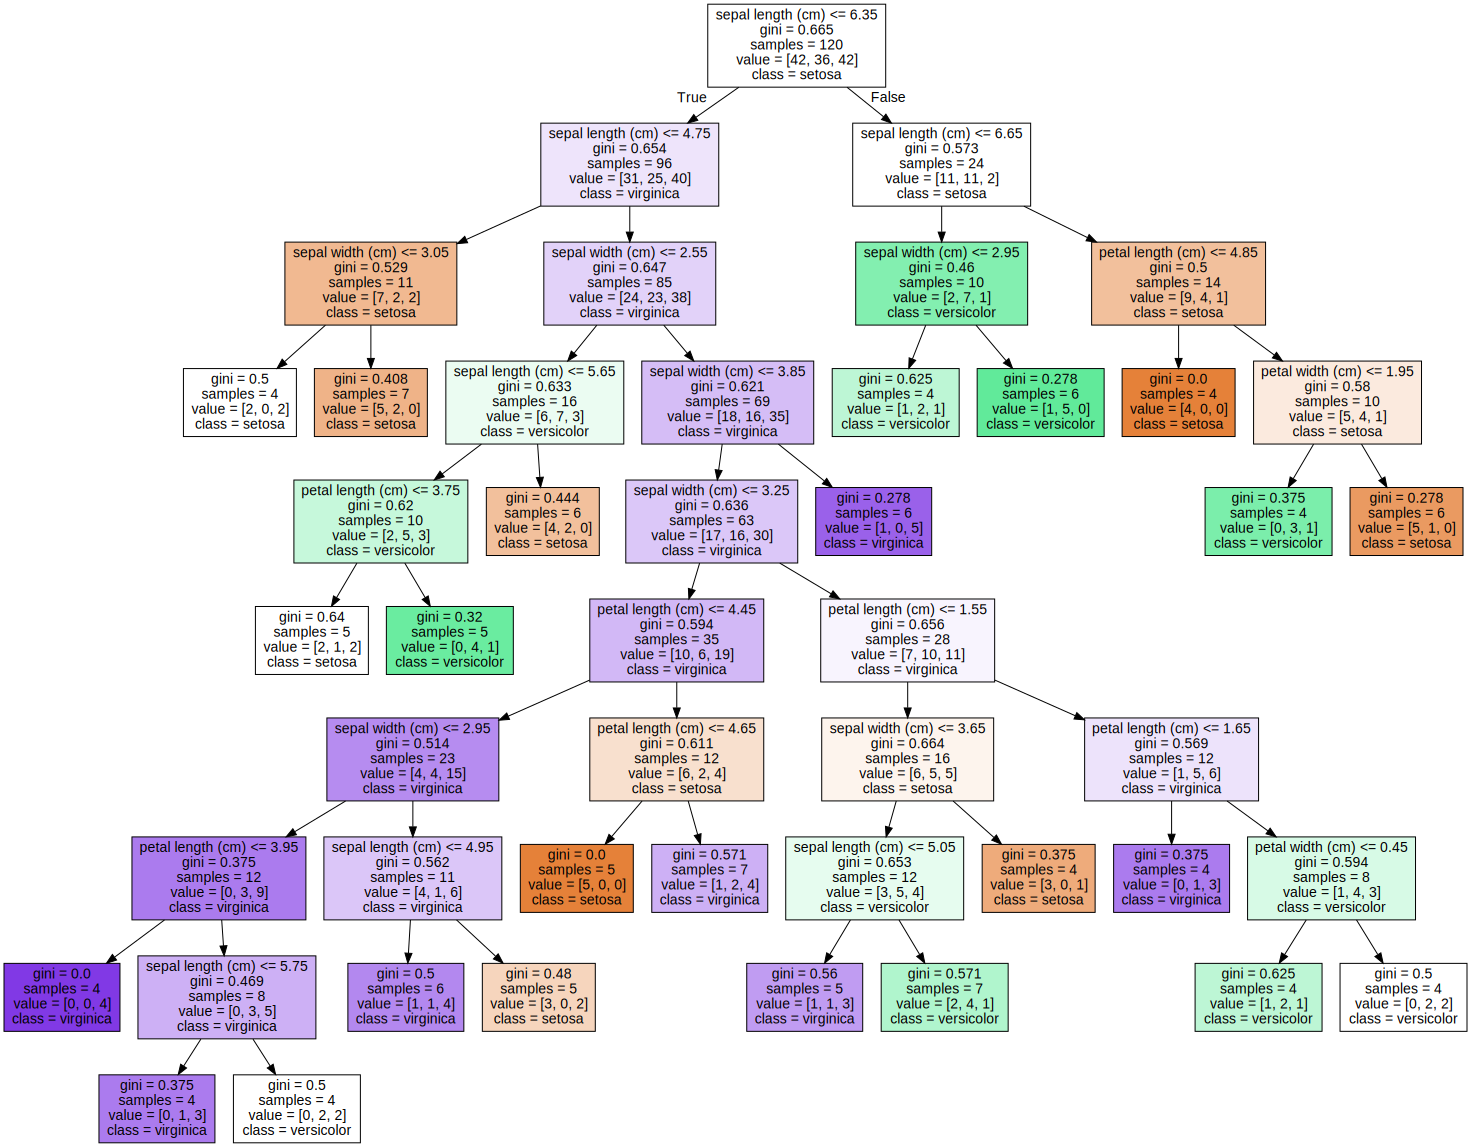

In [39]:
with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)